In [2]:
%load_ext autoreload
%autoreload 2

import numpy  as np
import pandas as pd
import h5py

import ehtplot
from matplotlib import pyplot as plt, cm

from common import dalt
from common import hallmark as hm
from common import viz

In [3]:
indices = ['mag', 'aspin', 'Rhigh', 'inc']

def get(m):
    def read(f, t, s, d):
        return pd.read_csv(m+f'/stat_{f}_{t}.tsv', sep='\t', usecols=indices+[s]).rename(columns={s:d}).set_index(indices)

    return pd.concat([
        read('86GHz',  'lc',    'med', 'Fnu_86GHz'   ),
        read('86GHz',  'major', 'med', 'major_86GHz' ),
        read('230GHz', 'mi3',   'med', 'mi3_230GHz'  ),
        read('230GHz', 'major', 'med', 'major_230GHz'),
        read('230GHz', 'minor', 'med', 'minor_230GHz'),
        read('NIR',    'sed',   'med', 'Fnu_NIR'     ),
        read('xray',   'sed',   'med', 'nuLnu_xray'  ),
        # mring radius
        # mring width
        # mring asymmetry
        # null locations
    ], axis=1)

df = get('cache/Illinois_thermal_w5')

for k in indices:
    globals()[k] = df.reset_index()[k].unique()
    print(k, globals()[k][:16])
    
def edges(i):
    m = (i[1:] + i[:-1]) / 2
    l = [2*i[ 0] - m[ 0]]
    r = [2*i[-1] - m[-1]]
    return np.concatenate([l, m, r])

Rhigh_edges = 10**edges(np.log10(Rhigh))
inc_edges = edges(inc)

mag ['M' 'S']
aspin [-0.94 -0.5   0.    0.5   0.94]
Rhigh [  1  10  40 160]
inc [ 10  30  50  70  90 110 130 150 170]


In [4]:
lower = 34.380696128049614
upper = 93.61106914382127

print(len(df))
print(np.sum(upper <= df.major_230GHz))
print(np.sum(df.minor_230GHz <= upper))
print(np.sum((df.minor_230GHz <= upper) & (upper <= df.major_230GHz)))
print(np.sum((lower <= df.major_230GHz) & (df.minor_230GHz <= upper)))
print(np.sum((lower <= df.minor_230GHz) & (df.major_230GHz <= upper)))

360
32
346
18
346
317


In [5]:
accept = pd.concat([
    (1.7 <= df.Fnu_86GHz  ) & (df.Fnu_86GHz   <= 2.3),
    (86  <= df.major_86GHz) & (df.major_86GHz <= 154),
    (0   <= df.mi3_230GHz ) & (df.mi3_230GHz  <= 0.1),
    # size_230GHz,
                              (df.Fnu_NIR     <= 1.1e-3),
                              (df.nuLnu_xray  <= 1e33),
    # mring radius?
    # mring width?
    # mring asymmetry
    # null locations
], axis=1)

df[accept.sum(axis=1) == 5]

Fnu_86GHz  major_86GHz  mi3_230GHz  major_230GHz  \
mag aspin Rhigh inc                                                     
M   -0.50 160   30    2.278044   122.292752    0.098462     80.433761   
                150   2.294351   124.047533    0.096340     80.520277   
     0.00 160   70    2.172176   140.504948    0.083838     79.035324   
                90    2.078028   143.003141    0.087216     76.296526   
                110   2.104689   139.743133    0.092699     77.346543   
                130   2.264433   134.096365    0.090839     80.733935   
S   -0.50 160   10    2.155446    98.970126    0.033885     74.656965   
                30    2.148525   148.362848    0.050359     83.898539   
                130   1.825985   151.620671    0.067492     79.273655   
                150   1.793494   122.399787    0.060634     79.418426   
                170   1.989254    96.365638    0.058050     79.132777   
     0.00 10    130   1.708416   117.225247    0.088727     65.143758   
                150   2.133763   130.702378    0.091887     78.968215   
          160   130   1.914034   141.651613    0.064056     85.827636   
                150   1.858771   104.861772    0.058441     76.669045   
                170   1.819288    89.874705    0.050522     74.192265   
     0.50 10    30    2.038321   116.898198    0.072710     69.110696   
                130   1.718483   104.790142    0.063397     56.477391   
                150   2.174197   117.399384    0.070028     69.468492   
     0.94 40    10    1.848819   120.732230    0.075169     69.524496   
                170   1.775968   120.583969    0.069612     70.607786   
          160   10    2.293247   123.587652    0.073061     78.057396   

                     minor_230GHz   Fnu_NIR    nuLnu_xray  
mag aspin Rhigh inc                                        
M   -0.50 160   30      71.208373  0.000143  5.555904e+31  
                150     73.687309  0.000142  5.465083e+31  
     0.00 160   70      70.549255  0.000264  6.765862e+31  
                90      70.618663  0.000433  1.019600e+32  
                110     71.366767  0.000252  7.046053e+31  
                130     73.258668  0.000157  5.094390e+31  
S   -0.50 160   10      68.836112  0.000058  2.661791e+31  
                30      60.813320  0.000079  4.205715e+31  
                130     60.451933  0.000055  2.966531e+31  
                150     66.419026  0.000025  1.330990e+31  
                170     74.226127  0.000015  8.088204e+30  
     0.00 10    130     55.550885  0.000032  6.555290e+32  
                150     68.323343  0.000025  6.902032e+32  
          160   130     56.365358  0.000025  1.779201e+31  
                150     67.448547  0.000018  1.402985e+31  
                170     70.727504  0.000021  1.425617e+31  
     0.50 10    30      60.472928  0.000036  3.044007e+32  
                130     48.680879  0.000047  3.319026e+32  
                150     61.231248  0.000045  3.524095e+32  
     0.94 40    10      63.202579  0.000130  3.412939e+32  
                170     64.471256  0.000106  3.080134e+32  
          160   10      67.928015  0.000023  4.523845e+31

In [6]:
Rhigh_edges[0]

0.31622776601683794

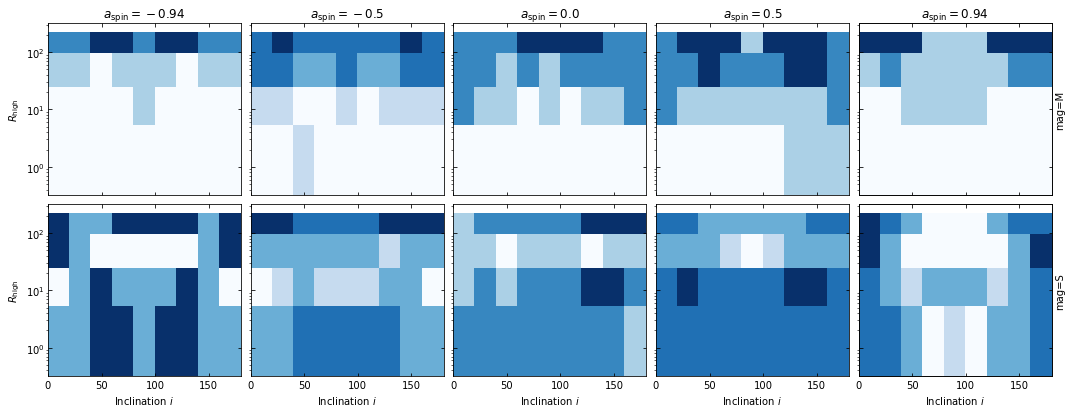

In [27]:
magmap = {'M':'MAD', 'S':'SANE'}

def fill(ax, a, b, off, color):
    L = inc_edges[a]
    R = inc_edges[a+1]
    B = Rhigh_edges[b]
    T = Rhigh_edges[b+1]
    
    f = 0    + 0.25 * off / 5
    ax.plot([f*L+(1-f)*R, f*L+(1-f)*R], [B, T], color=color)
    f = 0.25 + 0.25 * off / 5
    ax.plot([f*L+(1-f)*R, f*L+(1-f)*R], [B, T], color=color)
    f = 0.5  + 0.25 * off / 5
    ax.plot([f*L+(1-f)*R, f*L+(1-f)*R], [B, T], color=color)
    f = 0.75 + 0.25 * off / 5
    ax.plot([f*L+(1-f)*R, f*L+(1-f)*R], [B, T], color=color)

def plot_notused(ax, df):
    for i, (_, r) in enumerate(df.iterrows()):
        a = i %  len(inc)
        b = i // len(inc)
        
        if not r.Fnu_86GHz:
            fill(ax, a, b, 0, 'r')

        if not r.major_86GHz:
            fill(ax, a, b, 1, 'g')
            
        if not r.mi3_230GHz:
            fill(ax, a, b, 2, 'b')
            
        if not r.Fnu_NIR:
            fill(ax, a, b, 3, 'y')
            
        if not r.nuLnu_xray:
            fill(ax, a, b, 4, 'k')
            
    ax.set_xlim(inc_edges[0],   inc_edges[-1])
    ax.set_ylim(Rhigh_edges[0], Rhigh_edges[-1])
    ax.set_yscale('log')
    
def plot(ax, df):
    
    #print(df.set_index(indices).sum(axis=1))
    #print(df.set_index(indices).sum(axis=1).values.reshape((4,9)))

    v = df.set_index(indices).sum(axis=1).values.reshape((4,9))
    ax.pcolor(inc, Rhigh, v, shading='auto', cmap='Blues')
    
    ax.set_xlim(inc_edges[0],   inc_edges[-1])
    ax.set_ylim(Rhigh_edges[0], Rhigh_edges[-1])
    ax.set_yscale('log')

fig = viz.grid(
    accept.reset_index(), plot, aspin=aspin, mag=mag,
    figsize=(15,6),
    xspace=0.05, yspace=0.05,
    xtitle=r'$a_\mathrm{{spin}}={}$', ytitle=r'mag={}',
    xlabel='Inclination $i$',         ylabel=r'$R_\mathrm{high}$',
)